# Introduction
This dataset consist of male and female face images. We are going to try  deep learning techniques to predict images which it is a male face or female face.This is a beginner's kernel so every suggestions and advices are appreciated.
 
<font color='yellow'>
    
Content:
   
1. [Load Dataset](#1)
2. [Number of Train and Test Image](#2)
3. [Two Image From Dataset](#3)
4. [Process Dataset](#4)
    * [Train Dataset](#5)
    * [Test Dataset](#6)
5. [Preparing Data for Process](#7)
6. [Split Data with train_test_split](#8)
7. [Logistic Regression Without Sklearn](#9)
    * [Weights and Bias Initializing](#11)
    * [Sigmoid Function](#10) 
    * [Forward Backward Propagation](#12)
    * [Update](#13)
    * [Predict](#14)
    * [Logistic Regression](#15)
    * [Time to See Results](#16)
8. [Logistic Regression with Sklearn](#17)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
import os
from PIL import Image
import cv2


<a id="1"></a>
## 1.Load Dataset

In [2]:
train_path ="../input/gender-classification-dataset/Training"
test_path ="../input/gender-classification-dataset/Validation"

train_male = "../input/gender-classification-dataset/Training/male"
train_female = "../input/gender-classification-dataset/Training/female"

test_male = "../input/gender-classification-dataset/Validation/male"
test_female = "../input/gender-classification-dataset/Validation/female"

<a id="2"></a>
## 2.Number of Train and Test Image

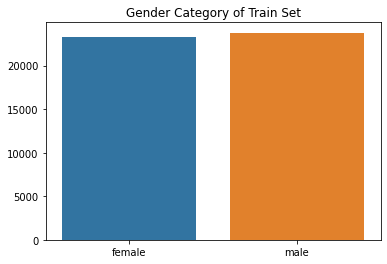

In [3]:
category_names = os.listdir(train_path)
num_category_names =len(category_names)
train_images = []
for category in category_names:
    folder = train_path +"/"+ category
    train_images.append(len(os.listdir(folder)))

g = sns.barplot(x=category_names,y=train_images)
g.set_title("Gender Category of Train Set");

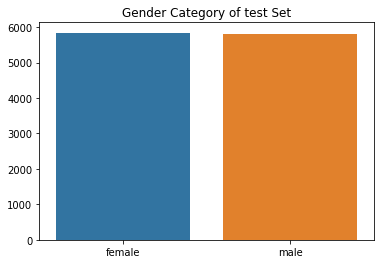

In [4]:
test_images = []
for category in category_names:
    folder = test_path +"/"+ category
    test_images.append(len(os.listdir(folder)))

g = sns.barplot(x=category_names,y=test_images)
g.set_title("Gender Category of test Set");

<a id="3"></a>
## 3.Two Image From Dataset

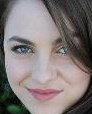

In [5]:
Image.open("../input/gender-classification-dataset/Training/female/131422.jpg.jpg")

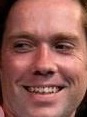

In [6]:
Image.open("../input/gender-classification-dataset/Training/male/090544.jpg.jpg")

<a id="4"></a>
## 4.Process Dataset
<a id="5"></a>
* ###      Train Dataset

In [7]:
male_train=[]
label = []
for i in os.listdir(train_male):
    if os.path.isfile(train_male+ "/" + i):
        males = Image.open(train_male+"/"+i).convert("L")# Converting grey scale
        males = males.resize((50,50),Image.ANTIALIAS)
        
        males = np.asarray(males)/255.0# Normalizing Images
        male_train.append(males)
        label.append(1)# Label 1 for man

In [8]:
female_train = []
for i in os.listdir(train_female):
    if os.path.isfile(train_female+ "/" + i):
        females = Image.open(train_female+ "/" + i)
        females = females.resize((50,50),Image.ANTIALIAS).convert("L")#Converting grey scale
        
        females = np.asarray(females)/255.0 # Normalizing Images
        
        female_train.append(females)
        label.append(0)# 0 for woman

In [9]:
x_train = np.concatenate((male_train,female_train),axis=0) # Training Dataset
y_train = np.asarray(label)# Label array
y_train = y_train.reshape(x_train.shape[0],1)


In [10]:
print("Woman Faces",np.shape(female_train),"Man Faces",np.shape(male_train))
print("Train Dataset",x_train.shape,"Train Values",y_train.shape)

Woman Faces (23243, 50, 50) Man Faces (23766, 50, 50)
Train Dataset (47009, 50, 50) Train Values (47009, 1)


<a id="6"></a>
* ### Test Dataset

In [11]:
male_test = []
label2 = []
for i in os.listdir(test_male):
    if os.path.isfile(test_male+ "/" + i):
        male_face = Image.open(test_male+ "/" + i).convert("L")#Convert grey scale
        male_face = male_face.resize((50,50),Image.ANTIALIAS)
        
        male_face = np.asarray(male_face)/255.0 # Normalizing Images
        male_test.append(male_face)
        label2.append(1)# 1 for man

In [12]:
female_test = []
for i in os.listdir(test_female):
    if os.path.isfile(test_female+"/"+i):
        female_face = Image.open(test_female+"/"+i).convert("L")#Convert grey scale
        female_face = female_face.resize((50,50),Image.ANTIALIAS)
        
        female_face = np.asarray(female_face)/255.0# Normalizing Image
        female_test.append(female_face)
        label2.append(0)# 0 for  woman

In [13]:
x_test = np.concatenate((male_test,female_test),axis=0)#test dataset
y_test = np.asarray(label2)
y_test = y_test.reshape(x_test.shape[0],1)


In [14]:
print("Man Faces",np.shape(male_test),"Female Faces",np.shape(female_test))
print("Test Dataset",x_test.shape,"Test Dataset Values",y_test.shape)

Man Faces (5808, 50, 50) Female Faces (5841, 50, 50)
Test Dataset (11649, 50, 50) Test Dataset Values (11649, 1)


<a id="7"></a>
## Preparing Data for Process

We will concatenate test dataset and train dataset after that we need 2D for Logistic Regression Model so we will convert it to 2D.

In [15]:
x = np.concatenate((x_train,x_test),axis=0)
y = np.concatenate((y_train,y_test),axis=0)

x = x.reshape(x.shape[0],x.shape[1]*x.shape[2])# Convert 3D to 2D



In [16]:
print("x shape:{}\ny shape{}".format(x.shape,y.shape))

x shape:(58658, 2500)
y shape(58658, 1)


<a id="8"></a>
## Split Data with train_test_split

**Now we have two array, x array contains our images, y contains our values 0(woman) and 1(man). Thanks to, train_test_split method, we will divide our data** 

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,
                                                 test_size=0.2,
                                                 random_state=42)

In [19]:
x_train = X_train.T
x_test = X_test.T
y_train = Y_train.T
y_test = Y_test.T
print("x_train:{}\nx_test:{}\ny_train:{}\ny_test:{}".format(x_train.shape,x_test.shape,y_train.shape,y_test.shape))

x_train:(2500, 46926)
x_test:(2500, 11732)
y_train:(1, 46926)
y_test:(1, 11732)


<a id="9"></a>
## Logistic Regression Without Sklearn

**Firstly,we will create our logistic regression without using libraries**

<a id="11"></a>
* ## Weights and Bias Initializing

In [20]:
def w_b_initialize(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b
    

<a id = "10"></a>
* ### Sigmoid Function

In [21]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

<a id="12"></a>
* ### Forward Backward Propagation

*We doing forward backward propagation because of optimum value of b,w. We calculate cost function. To backward propagation, we use gradient descent method. *

In [22]:
def forward_backward_propagation(w,b,x_train,y_train):
    # Forward Propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -(1-y_train)*np.log(1-y_head)-y_train*np.log(y_head)
    cost = np.sum(loss)/ x_train.shape[1] # x_train.shape[1] for scaling
    
    # Backward Propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]# x_train.shape[1] for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]# x_train.shape[1] for scaling
    
    gradients = {"derivative_weight":derivative_weight,"derivative_bias":derivative_bias}
    
    return cost, gradients
    

<a id="13"></a>
* ### Update

**With this function we will update our weights,bias values and make a graph about cost**

In [23]:
def update(w, b, x_train, y_train, learning_rate, num_iterations):
    cost_list = []
    cost_list2 = []
    index = []
    # update parameters is num_iterations times
    for i in range(num_iterations):
        cost, gradients = forward_backward_propagation(w,b,x_train,y_train)
        
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i %50 ==0:
            index.append(i)
            cost_list2.append(cost)
            print("After {} iteration cost: {}".format(i,cost))
    
    parameters = {"weights":w,"bias":b}
    plt.plot(index,cost_list2)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    
    return parameters     

<a id="14"></a>
* ### Predict

In [24]:
def predict(w, b, x_test):
    z = np.dot(w.T,x_test) + b
    y_head = sigmoid(z)
    
    y_prediction  = np.zeros((1,x_test.shape[1]))
    
    for i in range(x_test.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0:i] == 0
        else:
            y_prediction[0:i] == 1
            
    return y_prediction
    

<a id = "15"></a>
* ### Logistic Regression

In [25]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):

    w,b = w_b_initialize(x_train.shape[0])

    parameters = update(w, b, x_train, y_train, learning_rate, num_iterations)

    y_prediction_test = predict(parameters["weights"], parameters["bias"], x_test)
    y_prediction_train = predict(parameters["weights"], parameters["bias"], x_train)

    test_accuracy = 100 - np.mean(np.abs(y_prediction_train - y_train)*100)
    train_accuracy = 100 - np.mean(np.abs(y_prediction_test - y_test)*100)
    
    print("Test Accuracy :%{:.2f} ".format(test_accuracy))
    print("Train Accuracy:%{:.2f} ".format(train_accuracy))
    

<a id="16"></a>
* ### Time to See Results

After 0 iteration cost: 6.631161351193032
After 50 iteration cost: 0.6027747152709496
After 100 iteration cost: 0.5749823253849069
After 150 iteration cost: 0.5558260203884584
After 200 iteration cost: 0.5407863315166422
After 250 iteration cost: 0.5283581127624315
After 300 iteration cost: 0.5177995064928668
After 350 iteration cost: 0.5086569367545345
After 400 iteration cost: 0.5006236653206889
After 450 iteration cost: 0.4934813113243364


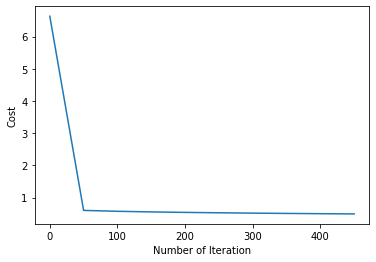

Test Accuracy :%49.59 
Train Accuracy:%49.57 


In [26]:
logistic_regression(x_train, y_train, x_test, y_test, 0.01, 500)

<a id="17"></a>
## Logistic Regression with Sklearn

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [28]:
log_reg = LogisticRegression().fit(X_train,Y_train)

In [29]:
print("Accuracy Score Train: %{:.2f} ".format(accuracy_score(log_reg.predict(X_train),Y_train)*100))
print("Accuracy Score Test: %{:.2f} ".format(accuracy_score(log_reg.predict(X_test),Y_test)*100))

Accuracy Score Train: %86.27 
Accuracy Score Test: %86.18 
